In [67]:
# =============================================================================
# GOOGLE PLAY STORE MONETIZATION ANALYSIS - DESCRIPTIVE ANALYTICS
# =============================================================================
# Project: Understanding how developer monetization strategies affect user outcomes
# Dataset: 60 Google Play Store apps with comprehensive metadata
# Focus: Revenue distribution, category insights, and correlation analysis
# Author: [Your Name] - Google Data Science Apprenticeship Portfolio
# ======================================================

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')

In [69]:
df = pd.read_csv('../dataset/playstore_dataset_clean.csv')

print(f"Dataset loaded in Dataframe successfully. Shape: {df.shape}")
df.head(2)

Dataset loaded in Dataframe successfully. Shape: (60, 33)


,appId,title,developer,developerId,released,score,ratings,installs,free,price,...,most_liked_review_score,most_liked_review_date,most_disliked_review,most_disliked_review_score,most_disliked_review_date,discovered_from_category,discovered_query,price_bucket,installs_clean,revenue_proxy
0,com.king.candycrushsaga,Candy Crush Saga,King,6577204690045492686,2012-11-15,4.619896,38967321,"1,000,000,000+",True,0,...,1,2025-07-22T02:19:25,"fun game as always, but the amount of pop ups ...",2.0,2025-02-13T01:59:01,GAME,top free games,Free,1000000000,0
1,com.rovio.baba,Angry Birds 2,Rovio Entertainment Oy,9133452689932095671,2015-07-23,4.160458,6278547,"100,000,000+",True,0,...,1,2025-03-14T13:48:59,Got back into this after playing the originals...,2.0,2025-06-30T05:27:42,GAME,top free games,Free,100000000,0


## CODE STARTS HERE

In [70]:
# 1. REVENUE DISTRIBUTION ANALYSIS
print("="*60)
print("1. REVENUE DISTRIBUTION ANALYSIS")
print("="*60)

1. REVENUE DISTRIBUTION ANALYSIS


In [71]:
# 1.1 Basic monetization breakdown
print("\n📊 Basic Monetization Breakdown:")
print("-" * 40)


📊 Basic Monetization Breakdown:
----------------------------------------


In [72]:
# Free vs Paid distribution

free_paid_dist = df['free'].value_counts()
print(f"Free Apps: {free_paid_dist[True]} ({free_paid_dist[True]/len(df)*100:.1f}%)")
#print(f"Paid Apps: {free_paid_dist[False]} ({free_paid_dist[False]/len(df)*100:.1f}%)")


Free Apps: 60 (100.0%)


In [73]:
# Among free apps, how many use ads or IAP?
free_apps = df[df['free'] == True]
print(f"\nAmong {len(free_apps)} free apps:")
print(f"  - With Ads: {free_apps['containsAds'].sum()} ({free_apps['containsAds'].sum()/len(free_apps)*100:.1f}%)")
print(f"  - With IAP: {free_apps['offersInAppPurchases'].sum()} ({free_apps['offersInAppPurchases'].sum()/len(free_apps)*100:.1f}%)")


Among 60 free apps:
  - With Ads: 26 (43.3%)
  - With IAP: 32 (53.3%)


In [74]:
# Hybrid monetization models
hybrid_free = free_apps[(free_apps['containsAds'] == True) & (free_apps['offersInAppPurchases'] == True)]
print(f"  - Hybrid (Ads + IAP): {len(hybrid_free)} ({len(hybrid_free)/len(free_apps)*100:.1f}%)")

  - Hybrid (Ads + IAP): 20 (33.3%)


In [75]:
# Pure freemium vs ad-supported vs hybrid
pure_freemium = free_apps[(free_apps['containsAds'] == False) & (free_apps['offersInAppPurchases'] == True)]
pure_ad_supported = free_apps[(free_apps['containsAds'] == True) & (free_apps['offersInAppPurchases'] == False)]
no_monetization = free_apps[(free_apps['containsAds'] == False) & (free_apps['offersInAppPurchases'] == False)]

print(f"  - Pure Freemium (IAP only): {len(pure_freemium)} ({len(pure_freemium)/len(free_apps)*100:.1f}%)")
print(f"  - Pure Ad-supported: {len(pure_ad_supported)} ({len(pure_ad_supported)/len(free_apps)*100:.1f}%)")
print(f"  - No visible monetization: {len(no_monetization)} ({len(no_monetization)/len(free_apps)*100:.1f}%)")

  - Pure Freemium (IAP only): 12 (20.0%)
  - Pure Ad-supported: 6 (10.0%)
  - No visible monetization: 22 (36.7%)


In [76]:
# 1.2 Create monetization strategy column for easier analysis
def categorize_monetization(row):
    if not row['free']:
        return 'Paid'
    elif row['containsAds'] and row['offersInAppPurchases']:
        return 'Hybrid (Ads + IAP)'
    elif row['containsAds']:
        return 'Ad-supported'
    elif row['offersInAppPurchases']:
        return 'Freemium (IAP)'
    else:
        return 'Free (No monetization)'

df['monetization_strategy'] = df.apply(categorize_monetization, axis=1)

print("\nMonetization Strategy Distribution:")
print("-" * 40)
strategy_counts = df['monetization_strategy'].value_counts()
for strategy, count in strategy_counts.items():
    percentage = count/len(df)*100
    print(f"{strategy}: {count} apps ({percentage:.1f}%)")


Monetization Strategy Distribution:
----------------------------------------
Free (No monetization): 22 apps (36.7%)
Hybrid (Ads + IAP): 20 apps (33.3%)
Freemium (IAP): 12 apps (20.0%)
Ad-supported: 6 apps (10.0%)


In [77]:
# 1.3 Revenue proxy analysis
print("\nRevenue Proxy Analysis:")
print("-" * 40)
revenue_stats = df.groupby('monetization_strategy')['revenue_proxy'].agg(['count', 'mean', 'median', 'std'])
revenue_stats['mean'] = revenue_stats['mean'].round(0)
revenue_stats['median'] = revenue_stats['median'].round(0)
revenue_stats['std'] = revenue_stats['std'].round(0)
print(revenue_stats)


Revenue Proxy Analysis:
----------------------------------------
                        count  mean  median  std
monetization_strategy                           
Ad-supported                6   0.0     0.0  0.0
Free (No monetization)     22   0.0     0.0  0.0
Freemium (IAP)             12   0.0     0.0  0.0
Hybrid (Ads + IAP)         20   0.0     0.0  0.0


In [78]:
# Price bucket analysis
print("\n💲 Price Bucket Distribution:")
print("-" * 40)
price_bucket_dist = df['price_bucket'].value_counts()
for bucket, count in price_bucket_dist.items():
    percentage = count/len(df)*100
    print(f"{bucket}: {count} apps ({percentage:.1f}%)")


💲 Price Bucket Distribution:
----------------------------------------
Free: 60 apps (100.0%)


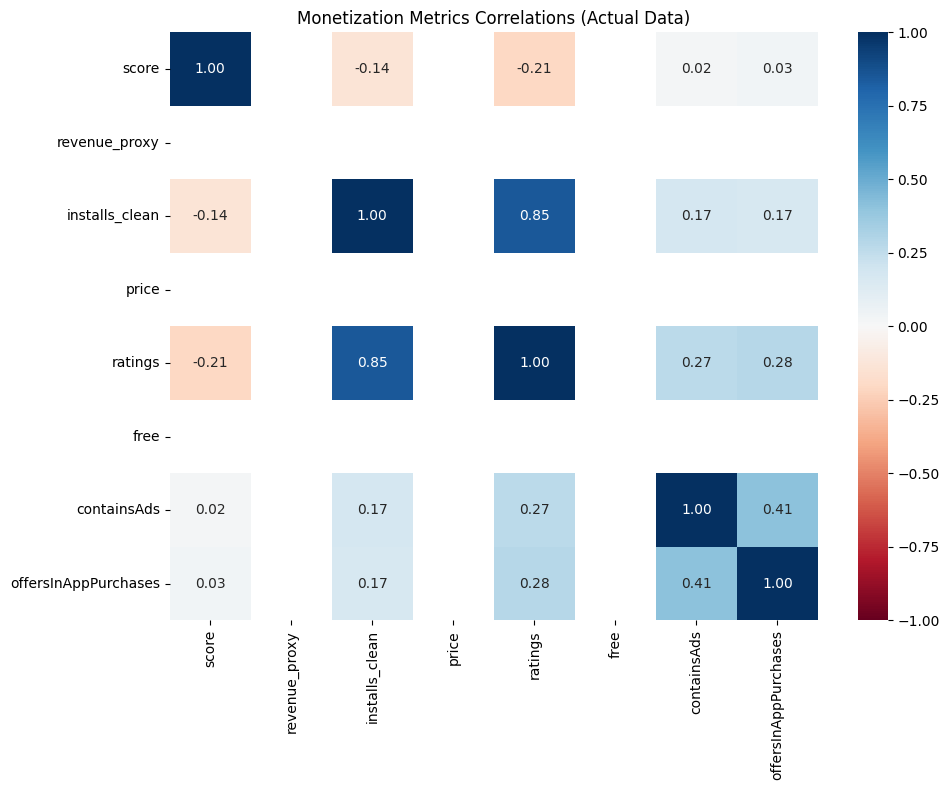

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric + encoded monetization columns
df_corr = df[['score', 'revenue_proxy', 'installs_clean', 'price', 'ratings',
              'free', 'containsAds', 'offersInAppPurchases']]

# Convert booleans to int for correlation
df_corr = df_corr.astype(int, errors='ignore')

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="RdBu", vmin=-1, vmax=1, cbar=True)
plt.title("Monetization Metrics Correlations (Actual Data)")
plt.tight_layout()
plt.show()


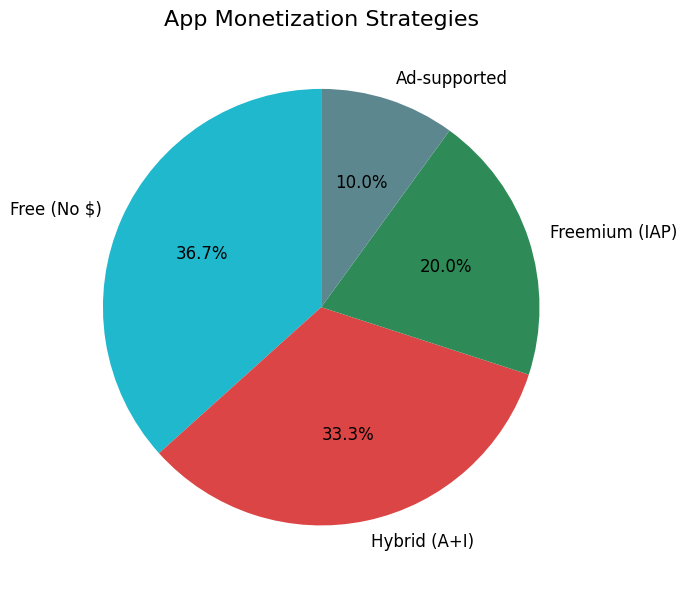

In [80]:
import matplotlib.pyplot as plt

# Get strategy counts from your dataframe
strategy_counts = df['monetization_strategy'].value_counts().reset_index()
strategy_counts.columns = ['strategy', 'count']

# Calculate percentages
strategy_counts['percentage'] = (strategy_counts['count'] / strategy_counts['count'].sum() * 100).round(1)

# Abbreviate long names to fit nicely in the pie chart
strategy_counts['strategy_short'] = strategy_counts['strategy'].replace({
    "Hybrid (Ads + IAP)": "Hybrid (A+I)",
    "Freemium (IAP)": "Freemium (IAP)",
    "Ad-supported": "Ad-supported",
    "Paid": "Paid",
    "Free (No monetization)": "Free (No $)"
})

# Define brand colors (one per strategy, keep consistent)
colors = ['#1FB8CD', '#DB4545', '#2E8B57', '#5D878F', '#D2BA4C']

# Create pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(strategy_counts['count'],
       labels=strategy_counts['strategy_short'],
       colors=colors[:len(strategy_counts)],  # adjust if fewer categories
       autopct='%1.1f%%',
       startangle=90,
       textprops={'fontsize': 12})

# Title
plt.title('App Monetization Strategies', fontsize=16)

# Save & show
plt.tight_layout()
plt.savefig('monetization_pie_chart_matplotlib.png', dpi=300, bbox_inches='tight')
plt.show()


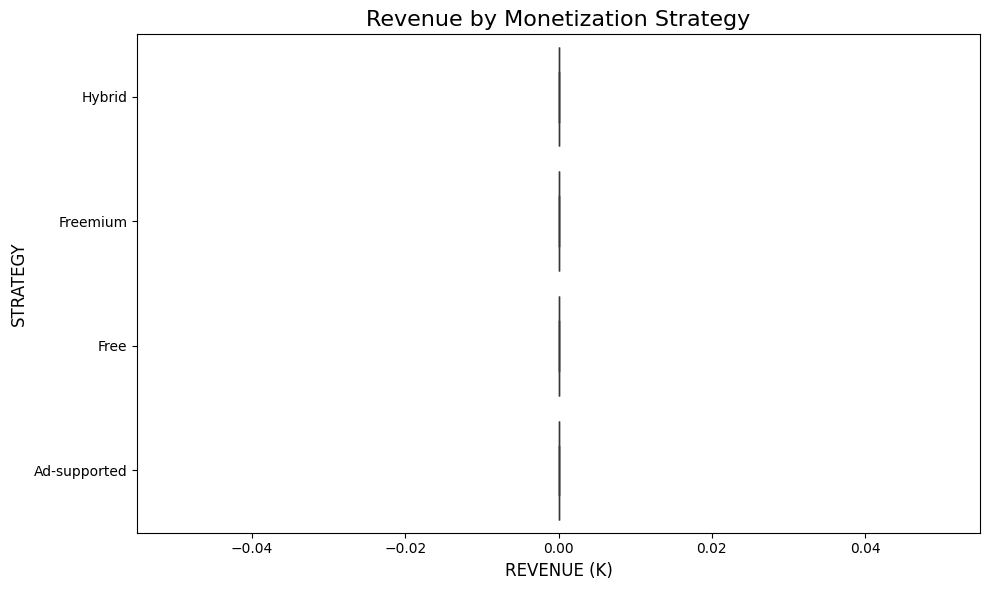

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use your real dataframe (df) with monetization_strategy + revenue_proxy
df_plot = df[['monetization_strategy', 'revenue_proxy']].copy()

# Convert to thousands for easier reading
df_plot['revenue_k'] = df_plot['revenue_proxy'] / 1000

# Shorten strategy names for display
strategy_mapping = {
    "Paid": "Paid",
    "Hybrid (Ads + IAP)": "Hybrid",
    "Freemium (IAP)": "Freemium",
    "Ad-supported": "Ad-supported",
    "Free (No monetization)": "Free"
}
df_plot['strategy_short'] = df_plot['monetization_strategy'].map(strategy_mapping)

# Define consistent colors
colors = ['#1FB8CD', '#DB4545', '#2E8B57', '#5D878F', '#D2BA4C']

# Create horizontal boxplot with seaborn (cleaner look, works with real data)
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_plot,
    x='revenue_k',
    y='strategy_short',
    palette=colors
)

# Labels and title
plt.xlabel('REVENUE (K)', fontsize=12)
plt.ylabel('STRATEGY', fontsize=12)
plt.title('Revenue by Monetization Strategy', fontsize=16)

# Save & show
plt.tight_layout()
plt.savefig('revenue_boxplot_matplotlib.png', dpi=300, bbox_inches='tight')
plt.show()
